<a href="https://colab.research.google.com/github/birzhan-kulmanov/Depth-Estimation/blob/main/Depth_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
import numpy as np
from tqdm import tqdm
import random


def hinton_allfiles():
    # list all files
    fldr = '/content/drive/MyDrive/4th year/Computer Vision/elce457_data/small/hinton'
    files = [f'{fldr}/{t}' for t in os.listdir(fldr) if 'npz' in t]
    random.shuffle(files)
    return files


def hinton_load_data():
    files = hinton_allfiles()
    x = []
    y = []
    for _filename in tqdm(files, desc='Reading data'):
        with np.load(_filename) as d:
            x.append(d['x'].astype(np.uint8))
            y.append(d['y'].astype(np.float32))
    return np.stack(x), np.stack(y)


data_x, data_y = hinton_load_data()

Reading data: 100%|██████████| 4000/4000 [01:38<00:00, 40.61it/s] 


In [ ]:
!pip install segmentation-models
import tensorflow as tf
import os
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import segmentation_models as sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Segmentation Models: using `keras` framework.


In [ ]:
#Splitting the DATA into train and test sets
random_state=100
X_train, X_test, y_train, y_test= train_test_split(data_x, data_y, random_state=random_state, test_size=0.15)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (3400, 192, 384, 3)
X_test_shape: (600, 192, 384, 3)
y_train_shape: (3400, 192, 384)
y_test_shape: (600, 192, 384)


In [ ]:
random_state=100
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, random_state=random_state, test_size=0.15/0.85)
print('X_train_shape: ' + str(X_train.shape) + '\nX_val_shape: ' + str(X_val.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_val_shape: ' + str(y_val.shape))

X_train_shape: (2800, 192, 384, 3)
X_val_shape: (600, 192, 384, 3)
y_train_shape: (2800, 192, 384)
y_val_shape: (600, 192, 384)


In [ ]:
preprocess_input = sm.get_preprocessing('efficientnetb3')

In [ ]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [ ]:
BASE_DIR = '/content/drive/MyDrive/4th year/Computer Vision/Final Project/'
run_save = True
if run_save:
    with open(BASE_DIR + "final_data_efficientnetb3.npy", 'wb') as f:
      np.save(f, X_train)
      np.save(f, X_val)
      np.save(f, X_test)
      np.save(f, y_train)
      np.save(f, y_val)
      np.save(f, y_test)

In [ ]:
import numpy as np
BASE_DIR = '/content/drive/MyDrive/4th year/Computer Vision/Final Project/'
run_save = True
if run_save:
    with open(BASE_DIR + "final_data_efficientnetb3.npy", 'rb') as f:
      X_train=np.load(f, allow_pickle=True)
      X_val=np.load(f, allow_pickle=True)
      X_test=np.load(f, allow_pickle=True)
      y_train=np.load(f, allow_pickle=True)
      y_val=np.load(f, allow_pickle=True)
      y_test=np.load(f, allow_pickle=True)

In [ ]:
X_train.shape

(2800, 192, 384, 3)

In [ ]:
batch_size = 8
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(batch_size*4).batch(batch_size)
dataset = dataset.prefetch(buffer_size=4)

In [ ]:
model = sm.Unet('efficientnetb3', input_shape=(192, 384,3), encoder_weights="imagenet")

In [ ]:
import tensorflow.keras.backend as K


#lrr=tf.keras.optimizers.schedules.ExponentialDecay(0.0003, 100, 0.9)
my_callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)]

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),
    loss='mse'
  )

In [ ]:
history = model.fit(dataset, epochs=10, validation_data=(X_val, y_val), callbacks = my_callbacks)

Epoch 1/10
350/350 [==============================] - 122s 349ms/step - loss: 0.0013 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 2/10
350/350 [==============================] - 122s 348ms/step - loss: 0.0013 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 3/10
350/350 [==============================] - 122s 349ms/step - loss: 0.0013 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 4/10
350/350 [==============================] - 122s 348ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 5/10
350/350 [==============================] - 122s 349ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 6/10
350/350 [==============================] - 122s 348ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 7/10
350/350 [==============================] - 122s 348ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 8/10
350/350 [==============================] - 122s 349ms/step - loss: 0.0012 - val_loss: 0.0014 - lr: 1.0000e-04
Epoch 9/10
350/350 [============

Text(0.5, 0, 'epoch')

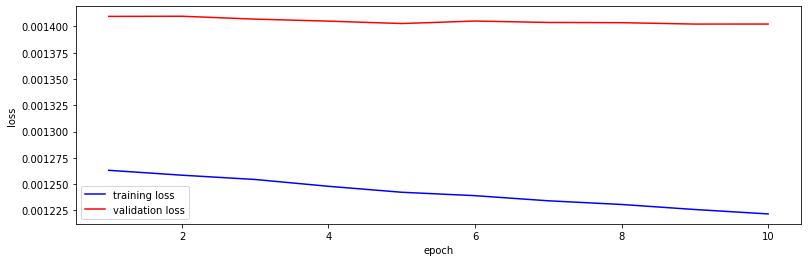

In [ ]:
import matplotlib.pyplot as plt 
epoch_count = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(13,4)) # create the first figure

plt.plot(epoch_count, history.history['loss'], 'b', label = 'training loss')
plt.plot(epoch_count, history.history['val_loss'], 'r', label = 'validation loss')  
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:

model.evaluate(X_test, y_test)

In [ ]:
loaded_mdl = tf.keras.models.load_model('/content/drive/MyDrive/4th year/Computer Vision/Final Project/model_resnet34.h5')

In [ ]:
predictions = loaded_mdl.predict(X_test)

19/19 [==============================] - 7s 212ms/step


In [ ]:
i = 71

In [ ]:
predictions = tf.squeeze(predictions)

In [ ]:
loaded_mdl = tf.keras.models.load_model('/content/drive/MyDrive/4th year/Computer Vision/Final Project/resnet34.h5')

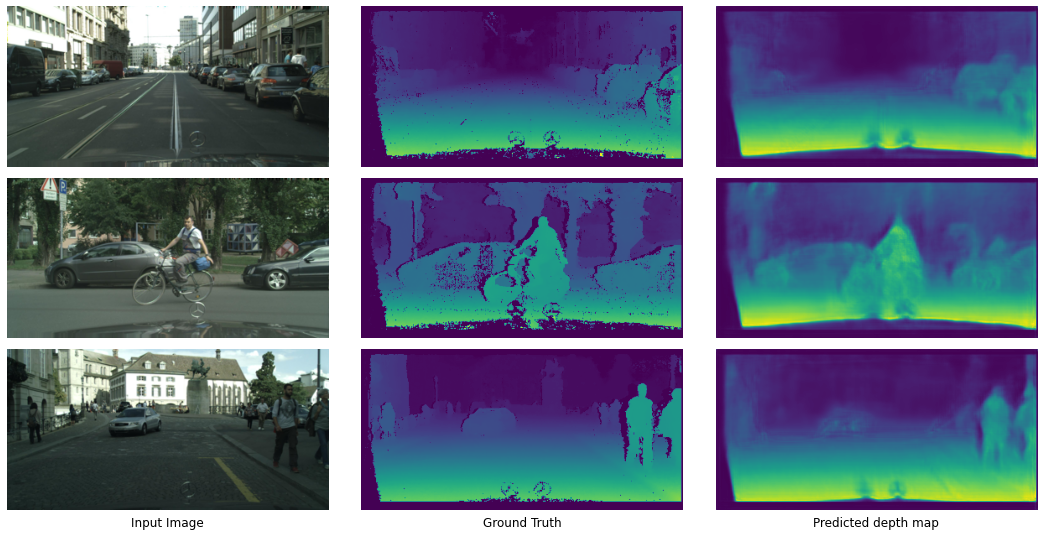

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7.5]
plt.rcParams["figure.autolayout"] = True


fig, ax = plt.subplots(nrows=3, ncols=3)

ax[0][0].axis('off')
ax[0][0].imshow(X_test[0])
ax[0][1].axis('off')
ax[0][1].imshow(y_test[0])
ax[0][2].axis('off')
ax[0][2].imshow(predictions[0])

ax[1][0].axis('off')
ax[1][0].imshow(X_test[17])
ax[1][1].axis('off')
ax[1][1].imshow(y_test[17])
ax[1][2].axis('off')
ax[1][2].imshow(predictions[17])

ax[2][0].axis('off')
ax[2][0].imshow(X_test[45])
ax[2][0].set_xlabel('Input Image')

ax[2][1].axis('off')
ax[2][1].imshow(y_test[45])
ax[2][1].set_xlabel('Ground Truth')

ax[2][2].axis('off')
ax[2][2].imshow(predictions[45])
ax[2][2].set_xlabel('Predicted depth map')

ax[2][0].text(0.5,-0.1, "Input Image", size=12, ha="center", 
         transform=ax[2][0].transAxes)

ax[2][1].text(0.5,-0.1, "Ground Truth", size=12, ha="center", 
         transform=ax[2][1].transAxes)

ax[2][2].text(0.5,-0.1, "Predicted depth map", size=12, ha="center", 
         transform=ax[2][2].transAxes)

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/4th year/Computer Vision/Final Project/efficientNetB3.h5')

In [ ]:
# model2=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model.h5')